Slučajni šetač/Brownovo gibanje

U ovom projektu mi je cilj napraviti simulaciju čestice koja se nasumično giba u 2D prostoru ovisno o zadanim uvjetima. Oni su:

1. Jedinični korak i diskretni smjerovi (jeddis) - korak veličine 1, samo u smjeru jedne koordinate
2. Jedinični korak i izotropni smjerovi (jedizo) - korak veličine 1, svi smjerovi su dopušteni
3. Jedinični srednji slobodni put i diskretni smjerovi (slodis) - korak ovisi o eksponencijalnoj raspodjeli $e^{-\frac{x}{\lambda}}$ uz $\lambda$=1, samo u smjeru jedne koordinate
4. Jedinični srednji slobodni put i izotropni smjerovi (sloizo) - korak ovisi o eksponencijalnoj raspodjeli $e^{-\frac{x}{\lambda}}$ uz $\lambda$=1, svi smjerovi su dopušteni

U prvom dijelu ću demonstrirati slučajnost generiranih putanja tako što ću za svaki uvjet generirati neki broj putanja ($\it{nput}$) s nekom količinom točaka ($\it{nk}$) te ću ih nacrtati na 4 grafa, po jedan za svaki uvjet. Funkcija koja generira pojedinu putanju uz njen uvjet prima parametar $\it{nk}$ te ga koristi za generiranje točaka u skladu sa svojim uvjetom. U diskretnim slučajevima eliminiram situaciju gdje su obje koordinate različite od nule tako da koristim generator slučajnih brojeva (s izborom 0 ili 1) za prvu koordinatu, a zatim množim drugu koordinatu suprotnom vrijednosti tog generatora. Funkcija $\it{znak()}$ služi dodavanju predznaka u situacijama gdje se ne pojavljuje prirodno. Kod izotropnih slučajeva, koristim slučajno generirani kut te koristim trigonometrijska pravila da bih ga pretvorio u Kartezijeve koordinate. Kad se lista potrebnih koordinata napuni, koristim naredbu $\it{numpy.cumsum()}$ da bih dobio kumulativan zbroj koordinata, tj. da bih iz pomaka stvorio put. Na kraju, koristim funkciju $\it{draw1()}$ koja prima parametar $\it{nput}$ i koristi ga da bi generirala i nacrtala $\it{nput}$ putanja za svaku funkciju.

In [1]:
%matplotlib inline
from sympy import *
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
def znak():
    if np.random.randint(0,2)==0:
        return -1
    return 1
def jeddis(nk):
    x=[np.random.randint(0,3)-1 for i in range(0, nk)]
    y=[znak()*int(not x[i]) for i in range(0, nk)]
    x[0]=0; y[0]=0
    x=np.cumsum(x); y=np.cumsum(y)    
    return(x, y)
def jedizo(nk):
    phi=[np.random.random()*2*np.pi for i in range(0, nk)]
    x=[np.cos(phi[i]) for i in range(0, nk)]
    y=[np.sin(phi[i]) for i in range(0, nk)]
    x[0]=0; y[0]=0
    x=np.cumsum(x); y=np.cumsum(y)
    return(x, y)
def slodis(nk):
    x=[znak()*np.random.randint(0,2)*np.random.exponential() for i in range(0, nk)]
    y=[znak()*np.random.exponential()*int(not x[i]) for i in range(0, nk)]
    x[0]=0; y[0]=0
    x=np.cumsum(x); y=np.cumsum(y)
    return(x, y)
def sloizo(nk):
    r=[np.random.exponential() for i in range(0, nk)]
    phi=[np.random.random()*2*np.pi for i in range(0, nk)]
    x=[np.cos(phi[i])*r[i] for i in range(0, nk)]
    y=[np.sin(phi[i])*r[i] for i in range(0, nk)]
    x[0]=0; y[0]=0
    x=np.cumsum(x); y=np.cumsum(y)
    return(x, y)
def draw1(nput, nk):
    fig,((ax1, ax2), (ax3, ax4))=plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[15,15])
    for i in range(0,nput):
        x,y=jeddis(nk)
        ax1.plot(x,y)
        x,y=jedizo(nk)
        ax2.plot(x,y)
        x,y=slodis(nk)
        ax3.plot(x,y)
        x,y=sloizo(nk)
        ax4.plot(x,y)
    ax1.set_title('Jeddis')
    ax2.set_title('Jedizo')
    ax3.set_title('Slodis')
    ax4.set_title('Sloizo')

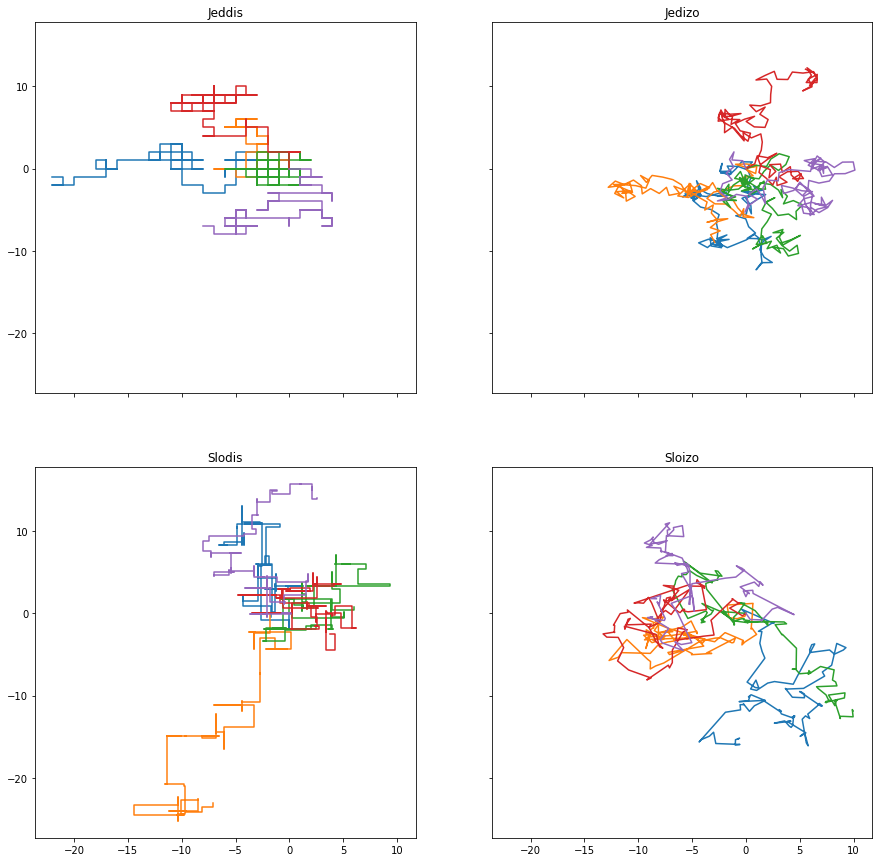

In [2]:
draw1(5, 100)

U drugom dijelu zadatka želim preklopiti putanje različitih uvjeta, ali istih generiranih koraka i kuteva. Pritom moram paziti da jedinični koraci ostanu takvi, a generirani kutevi budu prilagođeni pojedinom slučaju. Struktura samog koda je slična onome iz funkcija iz prvog dijela, međutim sada tražimo da su podaci zajednički, pa moramo drugačije napisati kod. Novost je funkcija $\it{kut()}$ koja služi prebacivanju izotropnih smjerova u diskretne dijeljenjem ravnine na 4 dijela. Funkcija $\it{draw2()}$ uzima parametar $\it{nk}$ i koristi ga da bi generirala po jednu putanju po svakom uvjetu, a zatim ih usporedila na način koji se vidi iz grafa.

In [3]:
def kut(g, h):
    if (abs(g)>=abs(h) and g>0):
        return 1
    if(abs(g)>=abs(h) and g<0):
        return -1
    return 0
def draw2(nk):
    r=[np.random.exponential() for i in range(0, nk)]
    phi=[np.random.random()*2*np.pi for i in range(0, nk)]
    x1=[np.cos(phi[i]) for i in range(0, nk)]
    y1=[np.sin(phi[i]) for i in range(0, nk)]
    x2=[r[i]*np.cos(phi[i]) for i in range(0, nk)]
    y2=[r[i]*np.sin(phi[i]) for i in range(0, nk)]
    x1d=[kut(x1[i], y1[i]) for i in range(0,nk)]
    y1d=[(not kut(x1[i], y1[i]))*np.sign(y1[i]) for i in range(0,nk)]
    x2d=[kut(x2[i], y2[i])*r[i] for i in range(0,nk)]
    y2d=[(not kut(x2[i], y2[i]))*np.sign(y2[i])*r[i] for i in range(0,nk)]
    x1[0]=0; y1[0]=0; x2[0]=0; y2[0]=0; x1d[0]=0; y1d[0]=0; x2d[0]=0; y2d[0]=0
    x1=np.cumsum(x1); x1d=np.cumsum(x1d); x2=np.cumsum(x2); x2d=np.cumsum(x2d) 
    y1=np.cumsum(y1); y1d=np.cumsum(y1d); y2=np.cumsum(y2); y2d=np.cumsum(y2d)
    fig,((ax1, ax2), (ax3, ax4))=plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=[15,15])
    ax1.plot(x1d,y1d, label='Jeddis')
    ax1.plot(x2d,y2d, label='Slodis')
    ax2.plot(x1,y1, label='Jedizo')
    ax2.plot(x2,y2, label='Sloizo')
    ax3.plot(x1,y1, label='Jedizo')
    ax3.plot(x1d,y1d, label='Jeddis')
    ax4.plot(x2,y2, label='Sloizo')
    ax4.plot(x2d,y2d, label='Slodis')
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()

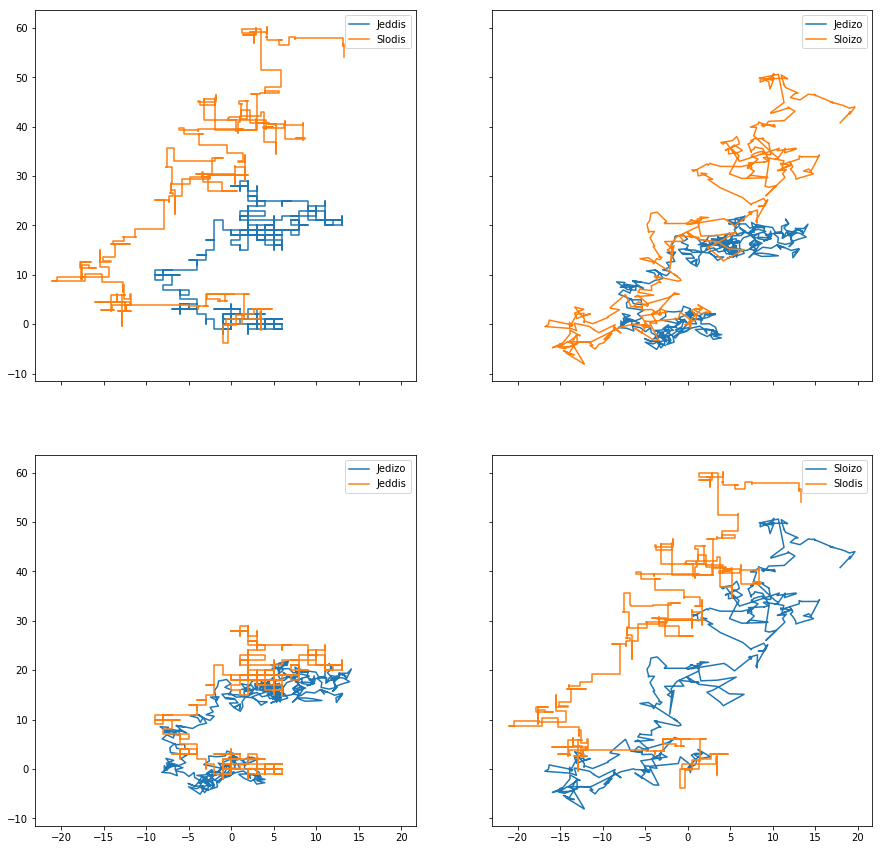

In [4]:
draw2(500)

U trećem, a ujedno i zadnjem dijelu zadatka zanima nas raspodjela konačne koordinate $\it{x}$ i udaljenosti zadnje generirane točke od ishodišta (tj. $\it{r}$). Ovdje koristimo funkcije iz prvog dijela da bismo generirali putanje, čije tražene parametre zatim spremamo u $\it{xn[]}$ i $\it{r[]}$. Iz tih podataka zatim crtamo raspodjelu vrijednosti pojedinih putanja, te svim putanjama s jednim od uvjeta određujemo srednju vrijednost, standardnu devijaciju i nepouzdanost tih vrijednosti s obzirom na konačni $\it{x}$ i $\it{r}$. Funkcija $\it{nepsir()}$ služi da bismo izračunali nepouzdanost standardne devijacije, pošto ona nije sadržana u dostupnim bibliotekama, niti je trivijalna za izvrijedniti. Funkcija $\it{draw3()}$ prima parametre $\it{nput}$ i $\it{nk}$ i obavlja sve već navedene radnje.

In [5]:
def nepsir(lis):
    n=len(lis)
    return ((1/(2*lis.std()))*sqrt(sum((lis-lis.mean())**4)/((n-2)*(n-3))-((n**2-3)*lis.std())/(n*(n-2)*(n-3))))
def draw3(nput, nk):
    r=[0 for i in range(0,nput)]
    xn=[0 for i in range(0,nput)]
    fig,(ax1, ax2)=plt.subplots(1, 2 , sharey=True, figsize=[15,15])
    for i in range(0,nput):
        x1,y1=jeddis(nk)
        x2,y2=jedizo(nk)
        x3,y3=slodis(nk)
        x4,y4=sloizo(nk)
        xn[i]=((x1[nk-1], x2[nk-1], x3[nk-1], x4[nk-1]))
        r[i]=((np.sqrt(x1[nk-1]**2+y1[nk-1]**2), np.sqrt(x2[nk-1]**2+y2[nk-1]**2), np.sqrt(x3[nk-1]**2+y3[nk-1]**2), np.sqrt(x4[nk-1]**2+y4[nk-1]**2)))
    xn=np.array(xn); r=np.array(r)
    ax1.hist(xn, alpha=0.5, edgecolor='black', color=['blue', 'green', 'brown', 'red'], label=['Jeddis', 'Jedizo', 'Slodis', 'Sloizo'])
    ax1.legend()
    ax2.hist(r, alpha=0.5, edgecolor='black', color=['blue', 'green', 'brown', 'red'], label=['Jeddis', 'Jedizo', 'Slodis', 'Sloizo'])
    ax2.legend()
    lstr=['Jeddis', 'Jedizo', 'Slodis', 'Sloizo']
    for i in range (0,4):
        print('{0}(x):\nSrednja vrijednost: {1:f}\nStandardna devijacija: {2:f}\nNepouzdanost srednje vrijednosti: {3:f}\nNepouzdanost standardne devijacije: {4:.6f}'\
              .format(lstr[i], xn[:,i].mean(), xn[:,i].std(), xn[:,i].mean()/(np.sqrt(nput)), nepsir(xn[:,i])))
        print('{0}(r):\nSrednja vrijednost: {1:f}\nStandardna devijacija: {2:f}\nNepouzdanost srednje vrijednosti: {3:f}\nNepouzdanost standardne devijacije: {4:.6f}'\
              .format(lstr[i], r[:,i].mean(), r[:,i].std(), r[:,i].mean()/(np.sqrt(nput)), nepsir(r[:,i])))
        print('\n')

Jeddis(x):
Srednja vrijednost: -0.680000
Standardna devijacija: 7.961005
Nepouzdanost srednje vrijednosti: -0.096167
Nepouzdanost standardne devijacije: 1.231965
Jeddis(r):
Srednja vrijednost: 8.337055
Standardna devijacija: 4.945050
Nepouzdanost srednje vrijednosti: 1.179038
Nepouzdanost standardne devijacije: 0.789145


Jedizo(x):
Srednja vrijednost: -0.538053
Standardna devijacija: 8.147257
Nepouzdanost srednje vrijednosti: -0.076092
Nepouzdanost standardne devijacije: 1.102675
Jedizo(r):
Srednja vrijednost: 9.389971
Standardna devijacija: 5.062515
Nepouzdanost srednje vrijednosti: 1.327942
Nepouzdanost standardne devijacije: 0.666340


Slodis(x):
Srednja vrijednost: -0.340462
Standardna devijacija: 10.374105
Nepouzdanost srednje vrijednosti: -0.048149
Nepouzdanost standardne devijacije: 1.213803
Slodis(r):
Srednja vrijednost: 12.439513
Standardna devijacija: 6.496381
Nepouzdanost srednje vrijednosti: 1.759213
Nepouzdanost standardne devijacije: 0.968815


Sloizo(x):
Srednja vrijedn

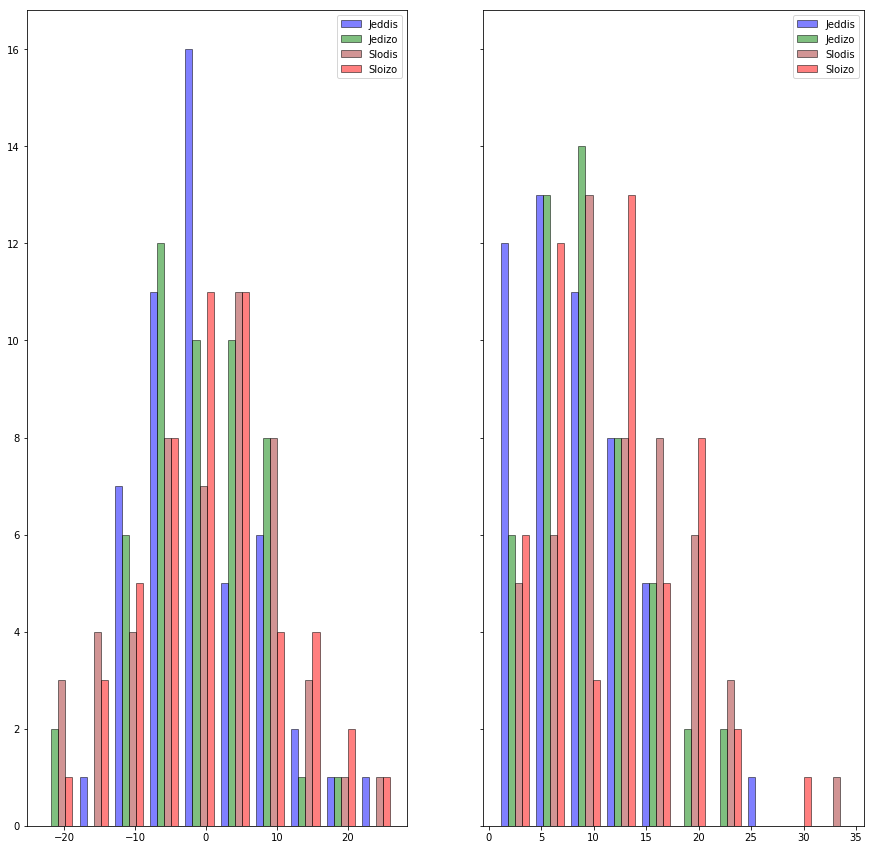

In [6]:
draw3(50, 100)